In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [84]:
present_ch4 = pd.read_csv('../data_predict/merged_PRESENT_ch4predicted.csv')
best_case_ch4 = pd.read_csv('../data_predict/merged_2100ssp126_ch4predicted.csv')
worst_case_ch4 = pd.read_csv('../data_predict/merged_2100ssp585_ch4predicted.csv')

In [85]:
present_co2 = pd.read_csv('../data_predict/merged_PRESENT_co2predicted.csv')
best_case_co2 = pd.read_csv('../data_predict/merged_2100ssp126_co2predicted.csv')
worst_case_co2 = pd.read_csv('../data_predict/merged_2100ssp585_co2predicted.csv')

In [86]:
present = present_co2.merge(present_ch4)
best_case = best_case_co2.merge(best_case_ch4)
worst_case = worst_case_co2.merge(worst_case_ch4)

In [103]:
inspect = [
'GRAND_ID',
'RIVER',
'YEAR',
'QUALITY',
'State',
'Pt_Own',
'OwType',
'Dam_Own',
'Type',
'CH_MWh',
'ch4_emissions',
'co2_emissions'
]
present_reduced = present[inspect]
best_case_reduced = best_case[inspect]
worst_case_reduced = worst_case[inspect]

In [104]:
present_reduced['QUALITY'] = [int(i[0]) for i in present['QUALITY']]
best_case_reduced['QUALITY'] = [int(i[0]) for i in best_case['QUALITY']]
worst_case_reduced['QUALITY'] = [int(i[0]) for i in worst_case['QUALITY']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [105]:
present['QUALITY'].value_counts()

2: Good          417
3: Fair           80
4: Poor           10
5: Unreliable      3
Name: QUALITY, dtype: int64

In [109]:
present_reduced.groupby('RIVER').agg({'GRAND_ID' : 'count',
                                      'ch4_emissions': 'mean',
                                      'co2_emissions': 'mean',
                                      'CH_MWh' : 'mean',
                                      'QUALITY' : 'mean'}).sort_values(by='GRAND_ID', ascending=False).head(10)

,GRAND_ID,ch4_emissions,co2_emissions,CH_MWh,QUALITY
RIVER,,,,,
Colorado River,11,18.838647,83.943018,6.913585e+05,2.181818
Tennessee River,8,14.894847,221.176544,1.089148e+06,2.125000
Coosa,7,19.885232,327.380569,3.659213e+05,2.142857
Catawba,7,9.006565,152.377295,1.119966e+05,2.000000
Snake River,7,16.709434,79.667313,6.809141e+05,2.000000
North Platte River,6,13.076522,33.848924,9.394864e+04,2.333333
Wisconsin,6,6.400172,111.183653,4.801425e+04,2.000000
Missouri,6,7.839304,179.518776,9.927352e+05,2.166667
Connecticut River,5,1.869401,316.214975,2.068483e+05,2.400000


In [116]:
best_case_reduced.groupby('RIVER').agg({'ch4_emissions': 'mean',
                                      'co2_emissions': 'mean',
                                      'CH_MWh': 'count',
                                      'QUALITY' : 'mean'}).sort_values(by='CH_MWh', ascending=False)

,ch4_emissions,co2_emissions,CH_MWh,QUALITY
RIVER,,,,
Colorado River,20.318566,90.684271,11,2.181818
Tennessee River,15.159047,236.773847,8,2.125000
Catawba,10.248423,164.980350,7,2.000000
Coosa,22.117638,387.062904,7,2.142857
Snake River,17.357077,83.694049,7,2.000000
...,...,...,...,...
Mono Creek,23.792293,52.968721,0,2.000000
Elk,1.400102,249.115994,0,5.000000
Trib. Arroyo Simi,29.256678,397.943445,0,2.000000


In [110]:
present_reduced['MWh/co2'] = present_reduced['CH_MWh']/present_reduced['co2_emissions']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
g = present_reduced.groupby('RIVER').agg({'GRAND_ID' : 'count',
                                      'MWh/co2' : 'sum',
                                      'QUALITY' : 'mean'}).sort_values(by='GRAND_ID', ascending=False)

[(-500, 5000)]

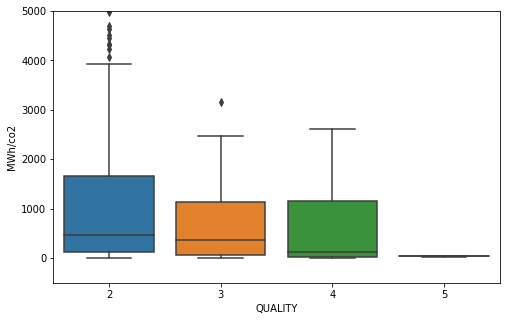

In [129]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='QUALITY', y='MWh/co2', data=present_reduced).set(ylim=(-500,5000))